<a href="https://colab.research.google.com/github/Sanskar6877/ChestXRay_Pneumonia_Detection/blob/main/Model4_vgg16_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/val'
test_path = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False


In [ ]:
folders = glob('/content/drive/MyDrive/chest_xray/train/*')

In [ ]:
x = Flatten()(vgg.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                  samplewise_center=False,  # set each sample mean to 0
                                 featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                 samplewise_std_normalization=False,  # divide each input by its std
                                 zca_whitening=False,  # apply ZCA whitening
                              rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.2, # Randomly zoom image
                            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                           height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                         horizontal_flip = True,  # randomly flip images
                        vertical_flip=False)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# providing the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 5216 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
163/163 [==============================] - 2754s 17s/step - loss: 0.2515 - accuracy: 0.8970 - val_loss: 0.2784 - val_accuracy: 0.8926
Epoch 2/10
163/163 [==============================] - 139s 853ms/step - loss: 0.1495 - accuracy: 0.9444 - val_loss: 0.3038 - val_accuracy: 0.8862
Epoch 3/10
163/163 [==============================] - 135s 826ms/step - loss: 0.1307 - accuracy: 0.9507 - val_loss: 0.3390 - val_accuracy: 0.8862
Epoch 4/10
163/163 [==============================] - 138s 842ms/step - loss: 0.1171 - accuracy: 0.9576 - val_loss: 0.2723 - val_accuracy: 0.9135
Epoch 5/10
163/163 [==============================] - 134s 821ms/step - loss: 0.1186 - accuracy: 0.9525 - val_loss: 0.3178 - val_accuracy: 0.8077
Epoch 6/10
163/163 [==============================] - 133s 816ms/step - loss: 0.1317 - accuracy: 0.9534 - val_loss: 0.2898 - val_accuracy: 0.9135
Epoch 7/10
163/163 [==============================] - 132s 811ms/step - loss: 0.0975 - accuracy: 0.9640 - val_loss: 0.2700 - 

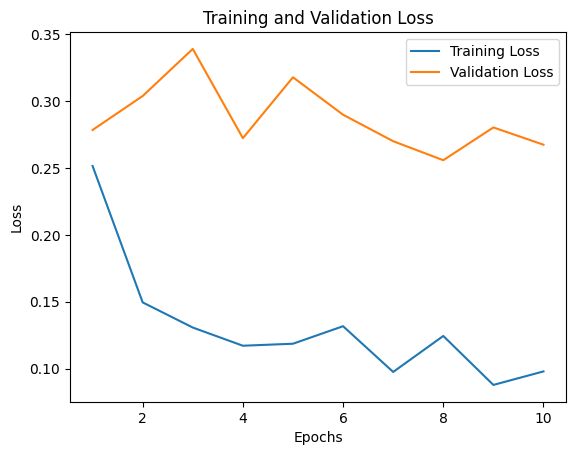

In [ ]:
# Plot training and validation loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:',test_loss)

20/20 - 7s - loss: 0.3674 - accuracy: 0.8942 - 7s/epoch - 360ms/step
Test accuracy: 0.8942307829856873
Test loss: 0.3673876225948334


In [ ]:
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score

# Predict probabilities for the test set
y_pred_probs = model.predict(test_set)
# Convert probabilities to class labels
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Get true labels for the test set
true_labels = test_set.labels
precision = precision_score(true_labels, y_pred_labels)
recall = recall_score(true_labels, y_pred_labels)
f1 = f1_score(true_labels, y_pred_labels)

# Print precision, recall, and F1-score
print("Precision of the model is - ", precision)
print("Recall of the model is - ", recall)
print("F1-score of the model is - ", f1)




Precision of the model is -  0.91035
Recall of the model is -  0.95698
F1-score of the model is -  0.92365
